In [2]:
!pip install matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 35.8 MB/s  0:00:009.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 53.2 MB/s  0:00:00 63.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 56.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 39.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib] 7/8 [matplotlib]


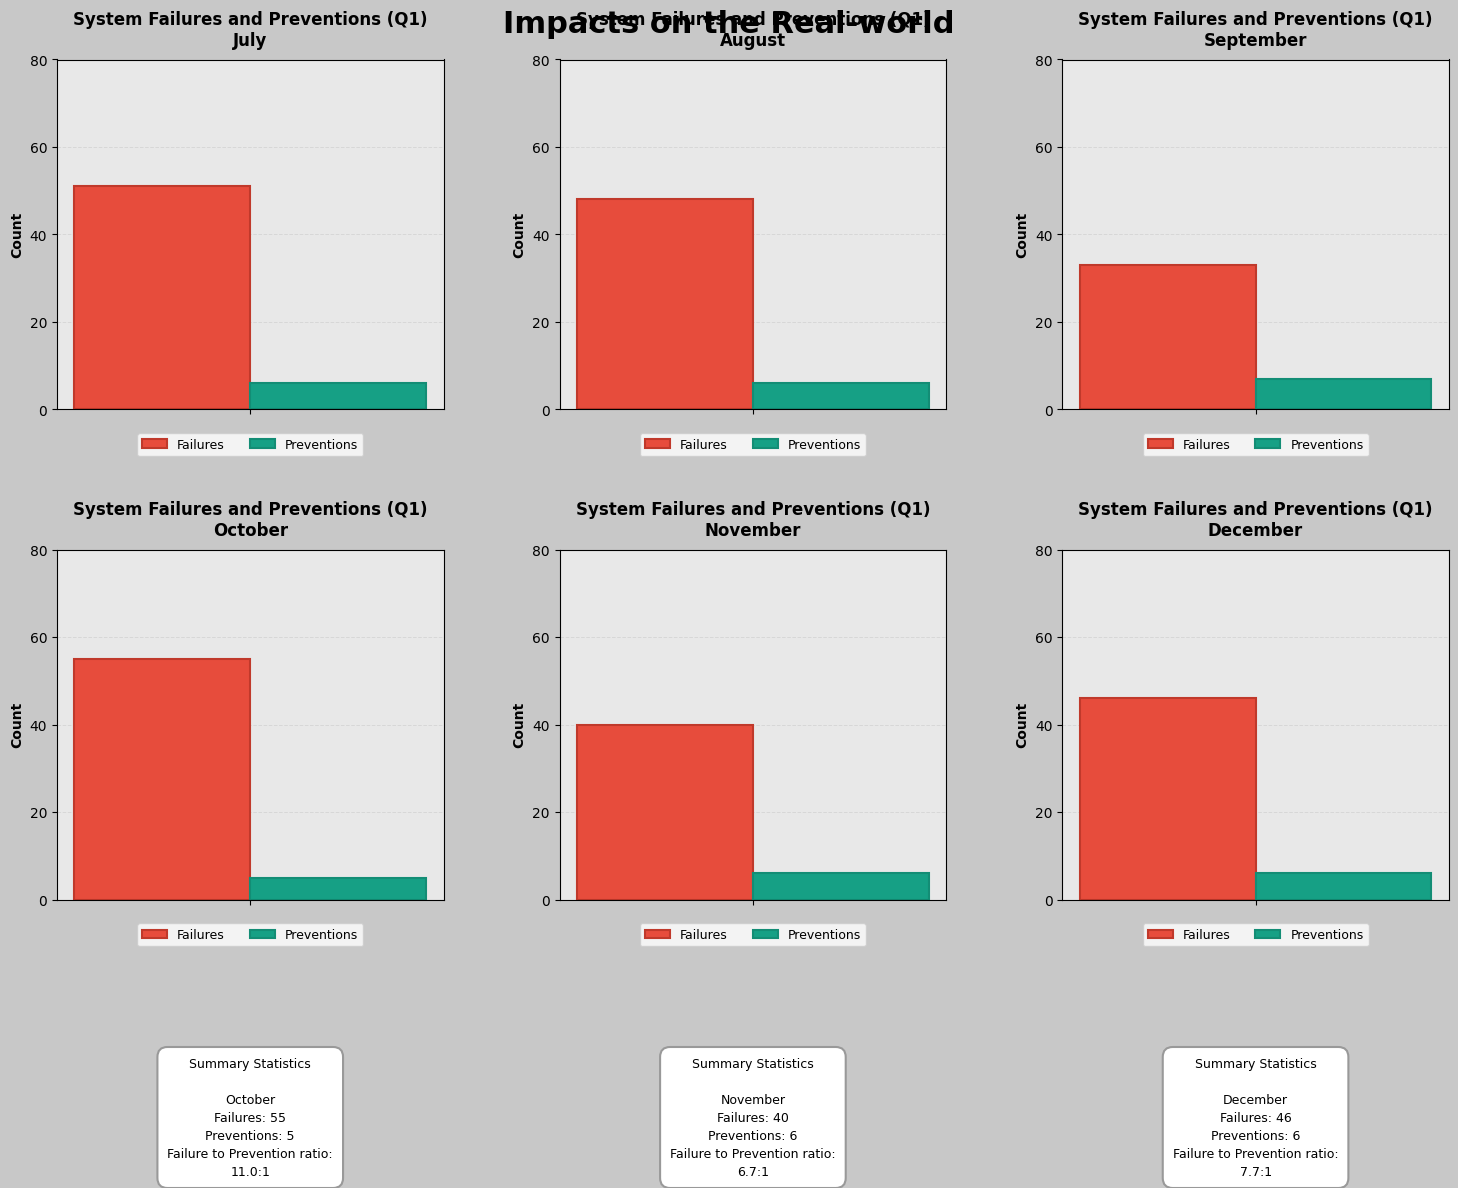

Chart created successfully!

Summary of all months:
July         | Total: 57 | Failures: 51 | Preventions: 6 | Ratio: 8.5:1
August       | Total: 54 | Failures: 48 | Preventions: 6 | Ratio: 8.0:1
September    | Total: 40 | Failures: 33 | Preventions: 7 | Ratio: 4.7:1
October      | Total: 60 | Failures: 55 | Preventions: 5 | Ratio: 11.0:1
November     | Total: 46 | Failures: 40 | Preventions: 6 | Ratio: 6.7:1
December     | Total: 52 | Failures: 46 | Preventions: 6 | Ratio: 7.7:1

Overall Statistics:
Total Failures: 273
Total Preventions: 36
Overall Ratio: 7.6:1


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import numpy as np

# Data for all months
months_data = [
    {'month': 'July', 'failures': 51, 'preventions': 6, 'total': 57},
    {'month': 'August', 'failures': 48, 'preventions': 6, 'total': 54},
    {'month': 'September', 'failures': 33, 'preventions': 7, 'total': 40},
    {'month': 'October', 'failures': 55, 'preventions': 5, 'total': 60},
    {'month': 'November', 'failures': 40, 'preventions': 6, 'total': 46},
    {'month': 'December', 'failures': 46, 'preventions': 6, 'total': 52}
]

def create_chart():
    """
    Create a 3x2 grid of charts showing System Failures and Preventions
    """
    # Create figure with gray background
    fig = plt.figure(figsize=(16, 10), facecolor='#c8c8c8')
    
    # Add main title
    fig.suptitle('Impacts on the Real-world', 
                 fontsize=22, fontweight='bold', y=0.97)
    
    # Create 2 rows, 3 columns grid
    gs = GridSpec(2, 3, figure=fig, hspace=0.4, wspace=0.3,
                  left=0.08, right=0.95, top=0.92, bottom=0.08)
    
    # Create subplot for each month
    for idx, data in enumerate(months_data):
        row = idx // 3
        col = idx % 3
        
        # Create subplot
        ax = fig.add_subplot(gs[row, col])
        ax.set_facecolor('#e8e8e8')
        
        # Extract data
        month = data['month']
        failures = data['failures']
        preventions = data['preventions']
        total = data['total']
        ratio = round(failures / preventions, 1)
        
        # Create bar chart
        categories = ['']
        x_pos = np.arange(len(categories))
        width = 0.35
        
        # Plot bars
        bars1 = ax.bar(x_pos - width/2, [failures], width, 
                       label='Failures', color='#e74c3c', 
                       edgecolor='#c0392b', linewidth=1.5)
        bars2 = ax.bar(x_pos + width/2, [preventions], width,
                       label='Preventions', color='#16a085',
                       edgecolor='#138d75', linewidth=1.5)
        
        # Set chart properties
        ax.set_ylim(0, 80)
        ax.set_yticks([0, 20, 40, 60, 80])
        ax.set_ylabel('Count', fontsize=10, fontweight='bold')
        ax.set_title(f'System Failures and Preventions (Q1)\n{month}',
                     fontsize=12, fontweight='bold', pad=10)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(categories)
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
        ax.set_axisbelow(True)
        
        # Add legend
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                 ncol=2, frameon=True, fontsize=9)
        
        # Add statistics box
        stats_text = f"Summary Statistics\n\n{month}\n"
        stats_text += f"Failures: {failures}\n"
        stats_text += f"Preventions: {preventions}\n"
        stats_text += f"Failure to Prevention ratio:\n{ratio}:1"
        
        # Position text box below chart
        ax.text(0.5, -0.45, stats_text,
                transform=ax.transAxes,
                fontsize=9,
                verticalalignment='top',
                horizontalalignment='center',
                bbox=dict(boxstyle='round,pad=0.8', 
                         facecolor='white', 
                         edgecolor='#999999',
                         linewidth=1.5),
                linespacing=1.5)
    
    # Save the figure
    plt.savefig('system_failures_preventions.png', 
                dpi=300, 
                bbox_inches='tight',
                facecolor='#c8c8c8')
    
    # Show the plot
    plt.show()
    
    print("Chart created successfully!")
    print("\nSummary of all months:")
    print("="*60)
    for data in months_data:
        ratio = round(data['failures'] / data['preventions'], 1)
        print(f"{data['month']:12} | Total: {data['total']:2} | "
              f"Failures: {data['failures']:2} | Preventions: {data['preventions']} | "
              f"Ratio: {ratio}:1")
    print("="*60)
    
    # Calculate overall statistics
    total_failures = sum(d['failures'] for d in months_data)
    total_preventions = sum(d['preventions'] for d in months_data)
    overall_ratio = round(total_failures / total_preventions, 1)
    
    print(f"\nOverall Statistics:")
    print(f"Total Failures: {total_failures}")
    print(f"Total Preventions: {total_preventions}")
    print(f"Overall Ratio: {overall_ratio}:1")


if __name__ == "__main__":
    create_chart()

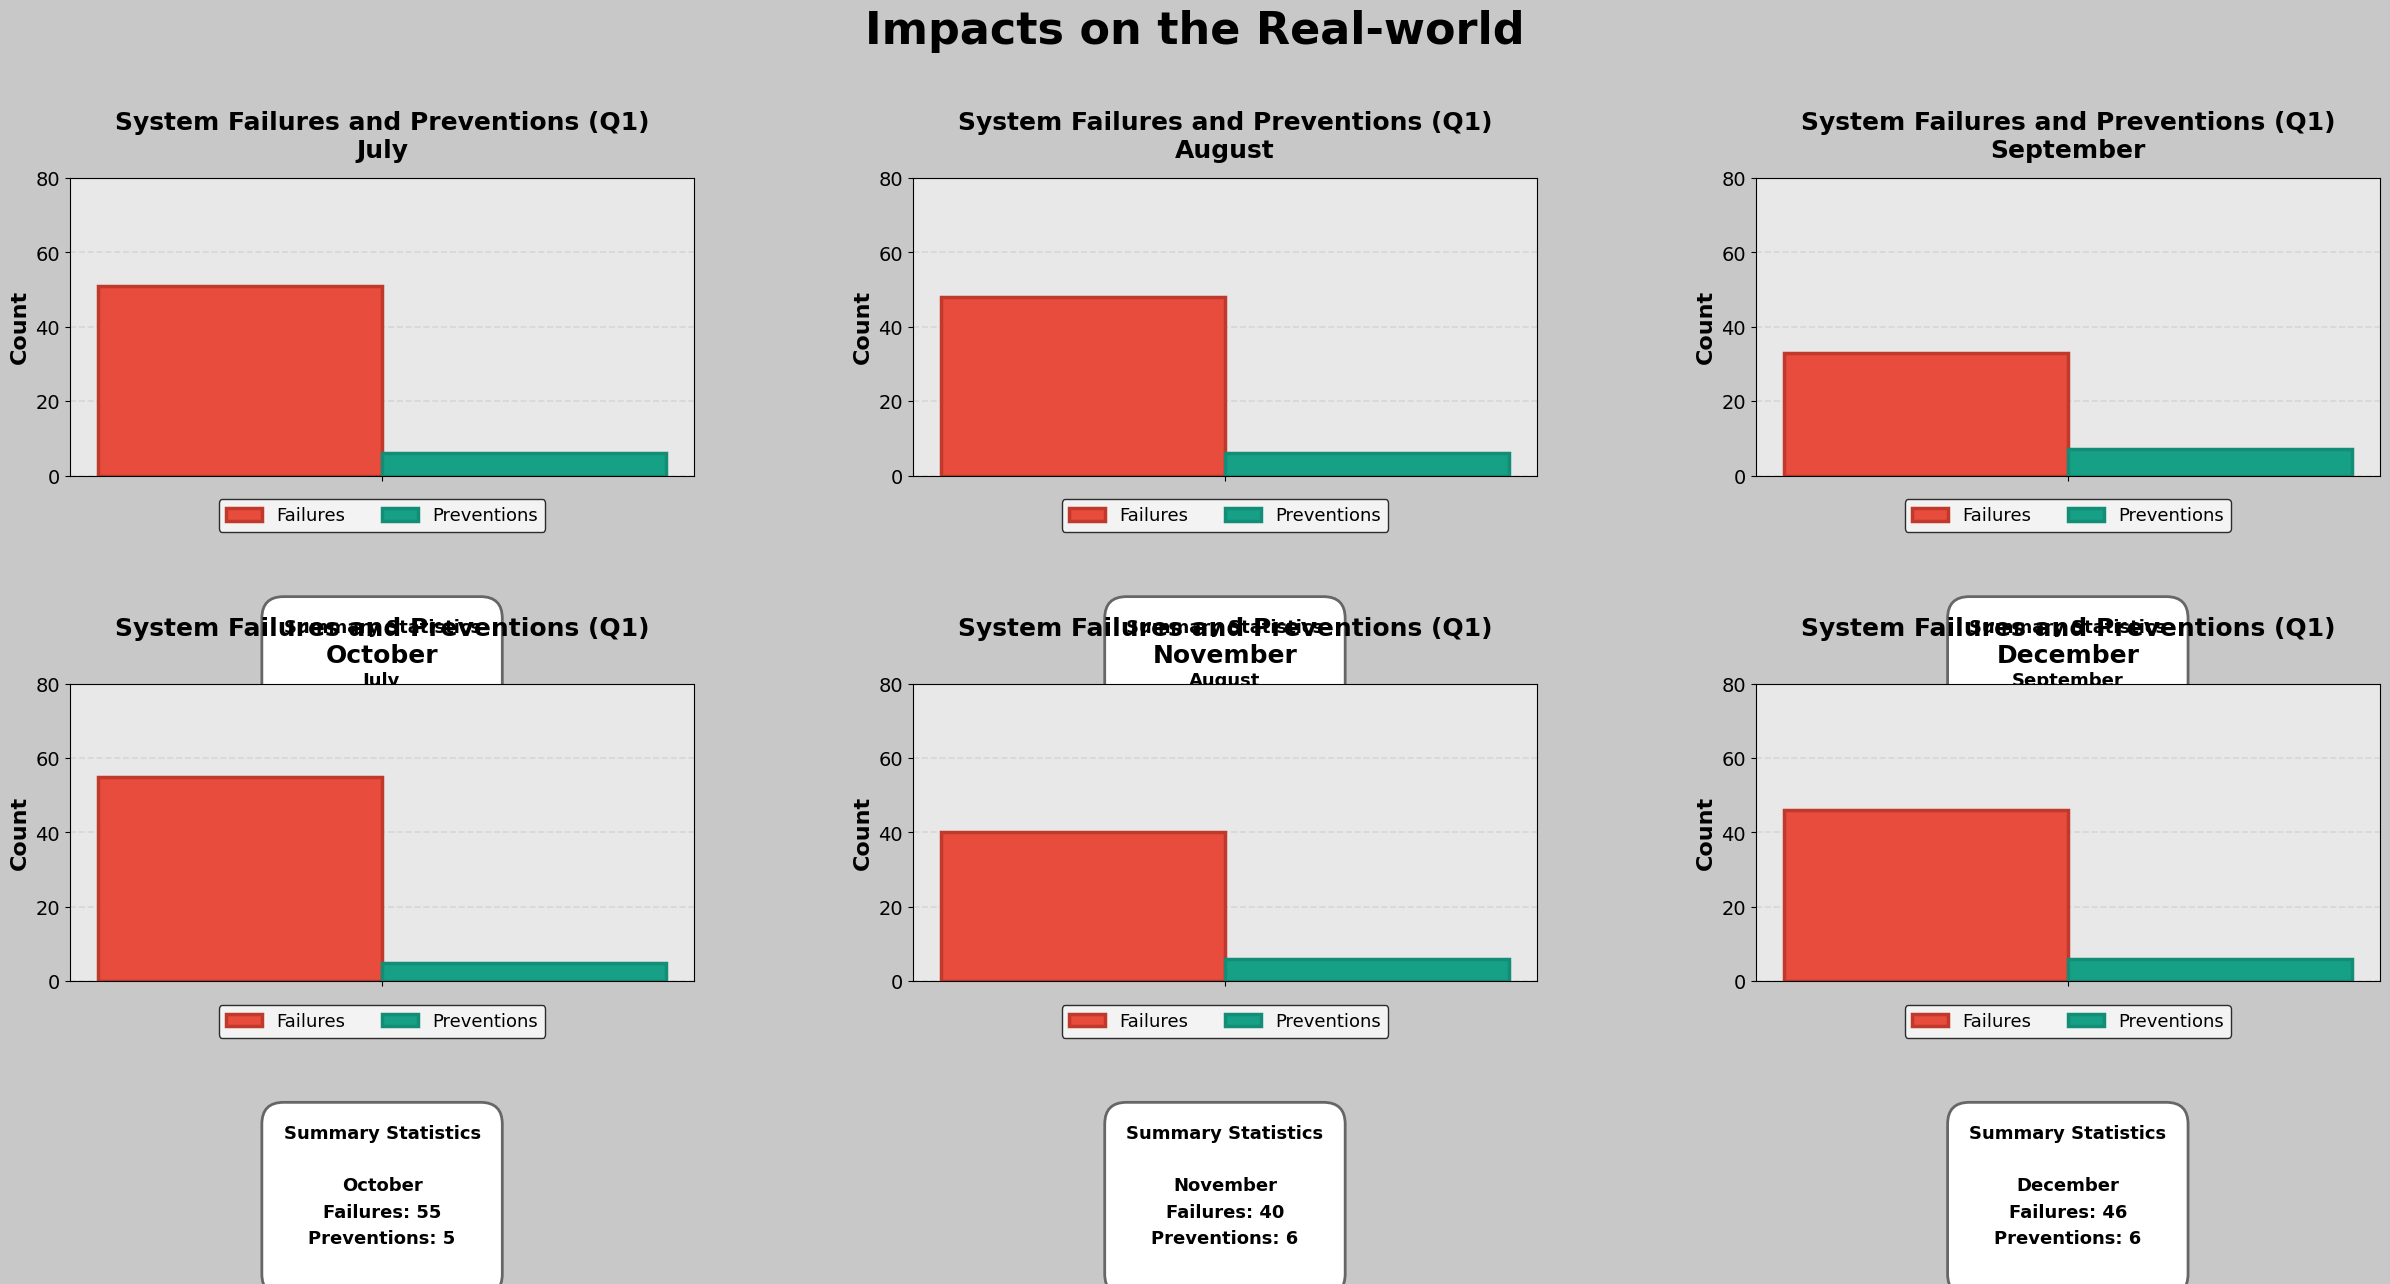


CHART CREATED SUCCESSFULLY!

SUMMARY OF ALL MONTHS:
July         | Total: 57 | Failures: 51 | Preventions: 6 | Ratio: 8.5:1
August       | Total: 54 | Failures: 48 | Preventions: 6 | Ratio: 8.0:1
September    | Total: 40 | Failures: 33 | Preventions: 7 | Ratio: 4.7:1
October      | Total: 60 | Failures: 55 | Preventions: 5 | Ratio: 11.0:1
November     | Total: 46 | Failures: 40 | Preventions: 6 | Ratio: 6.7:1
December     | Total: 52 | Failures: 46 | Preventions: 6 | Ratio: 7.7:1

OVERALL STATISTICS:
  • Total Failures: 273
  • Total Preventions: 36
  • Overall Ratio: 7.6:1



In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for all months
months_data = [
    {'month': 'July', 'failures': 51, 'preventions': 6, 'total': 57},
    {'month': 'August', 'failures': 48, 'preventions': 6, 'total': 54},
    {'month': 'September', 'failures': 33, 'preventions': 7, 'total': 40},
    {'month': 'October', 'failures': 55, 'preventions': 5, 'total': 60},
    {'month': 'November', 'failures': 40, 'preventions': 6, 'total': 46},
    {'month': 'December', 'failures': 46, 'preventions': 6, 'total': 52}
]

def create_chart():
    """
    Create a 3x2 grid of charts showing System Failures and Preventions
    """
    # Create LARGER figure with gray background
    fig, axes = plt.subplots(2, 3, figsize=(24, 14), facecolor='#c8c8c8')
    
    # Add main title - BIGGER
    fig.suptitle('Impacts on the Real-world', 
                 fontsize=32, fontweight='bold', y=0.98)
    
    # Flatten the 2D array of axes for easier iteration
    axes = axes.flatten()
    
    # Create subplot for each month
    for idx, data in enumerate(months_data):
        ax = axes[idx]
        ax.set_facecolor('#e8e8e8')
        
        # Extract data
        month = data['month']
        failures = data['failures']
        preventions = data['preventions']
        total = data['total']
        ratio = round(failures / preventions, 1)
        
        # Create bar chart with WIDER bars
        categories = ['']
        x_pos = np.arange(len(categories))
        width = 0.5  # Wider bars
        
        # Plot bars
        bars1 = ax.bar(x_pos - width/2, [failures], width, 
                       label='Failures', color='#e74c3c', 
                       edgecolor='#c0392b', linewidth=2.5)
        bars2 = ax.bar(x_pos + width/2, [preventions], width,
                       label='Preventions', color='#16a085',
                       edgecolor='#138d75', linewidth=2.5)
        
        # Set chart properties with LARGER fonts
        ax.set_ylim(0, 80)
        ax.set_yticks([0, 20, 40, 60, 80])
        ax.set_ylabel('Count', fontsize=16, fontweight='bold')
        ax.set_title(f'System Failures and Preventions (Q1)\n{month}',
                     fontsize=18, fontweight='bold', pad=15)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(categories)
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1.2)
        ax.set_axisbelow(True)
        
        # Larger tick labels
        ax.tick_params(axis='both', which='major', labelsize=14)
        
        # Add legend with BIGGER font
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                 ncol=2, frameon=True, fontsize=13, 
                 markerscale=1.5, edgecolor='black', fancybox=True)
        
        # Add statistics box with LARGER text
        stats_text = f"Summary Statistics\n\n{month}\n"
        stats_text += f"Failures: {failures}\n"
        stats_text += f"Preventions: {preventions}\n"
        # stats_text += f"Failure to Prevention ratio:\n{ratio}:1"
        
        # Position text box below chart - BIGGER
        ax.text(0.5, -0.48, stats_text,
                transform=ax.transAxes,
                fontsize=13,  # Bigger font
                verticalalignment='top',
                horizontalalignment='center',
                bbox=dict(boxstyle='round,pad=1.2',  # More padding
                         facecolor='white', 
                         edgecolor='#666666',
                         linewidth=2),
                linespacing=1.6,
                fontweight='bold')
    
    # Adjust layout with more spacing
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.subplots_adjust(hspace=0.7, wspace=0.35)
    
    # Save the figure in HIGHER resolution
    plt.savefig('system_failures_preventions_large.png', 
                dpi=400,  # Higher DPI for better quality
                bbox_inches='tight',
                facecolor='#c8c8c8')
    
    # Show the plot
    plt.show()
    
    print("\n" + "="*70)
    print("CHART CREATED SUCCESSFULLY!")
    print("="*70)
    print("\nSUMMARY OF ALL MONTHS:")
    print("="*70)
    for data in months_data:
        ratio = round(data['failures'] / data['preventions'], 1)
        print(f"{data['month']:12} | Total: {data['total']:2} | "
              f"Failures: {data['failures']:2} | Preventions: {data['preventions']} | "
              f"Ratio: {ratio}:1")
    print("="*70)
    
    # Calculate overall statistics
    total_failures = sum(d['failures'] for d in months_data)
    total_preventions = sum(d['preventions'] for d in months_data)
    overall_ratio = round(total_failures / total_preventions, 1)
    
    print(f"\nOVERALL STATISTICS:")
    print(f"  • Total Failures: {total_failures}")
    print(f"  • Total Preventions: {total_preventions}")
    print(f"  • Overall Ratio: {overall_ratio}:1")
    print("="*70 + "\n")


if __name__ == "__main__":
    create_chart()

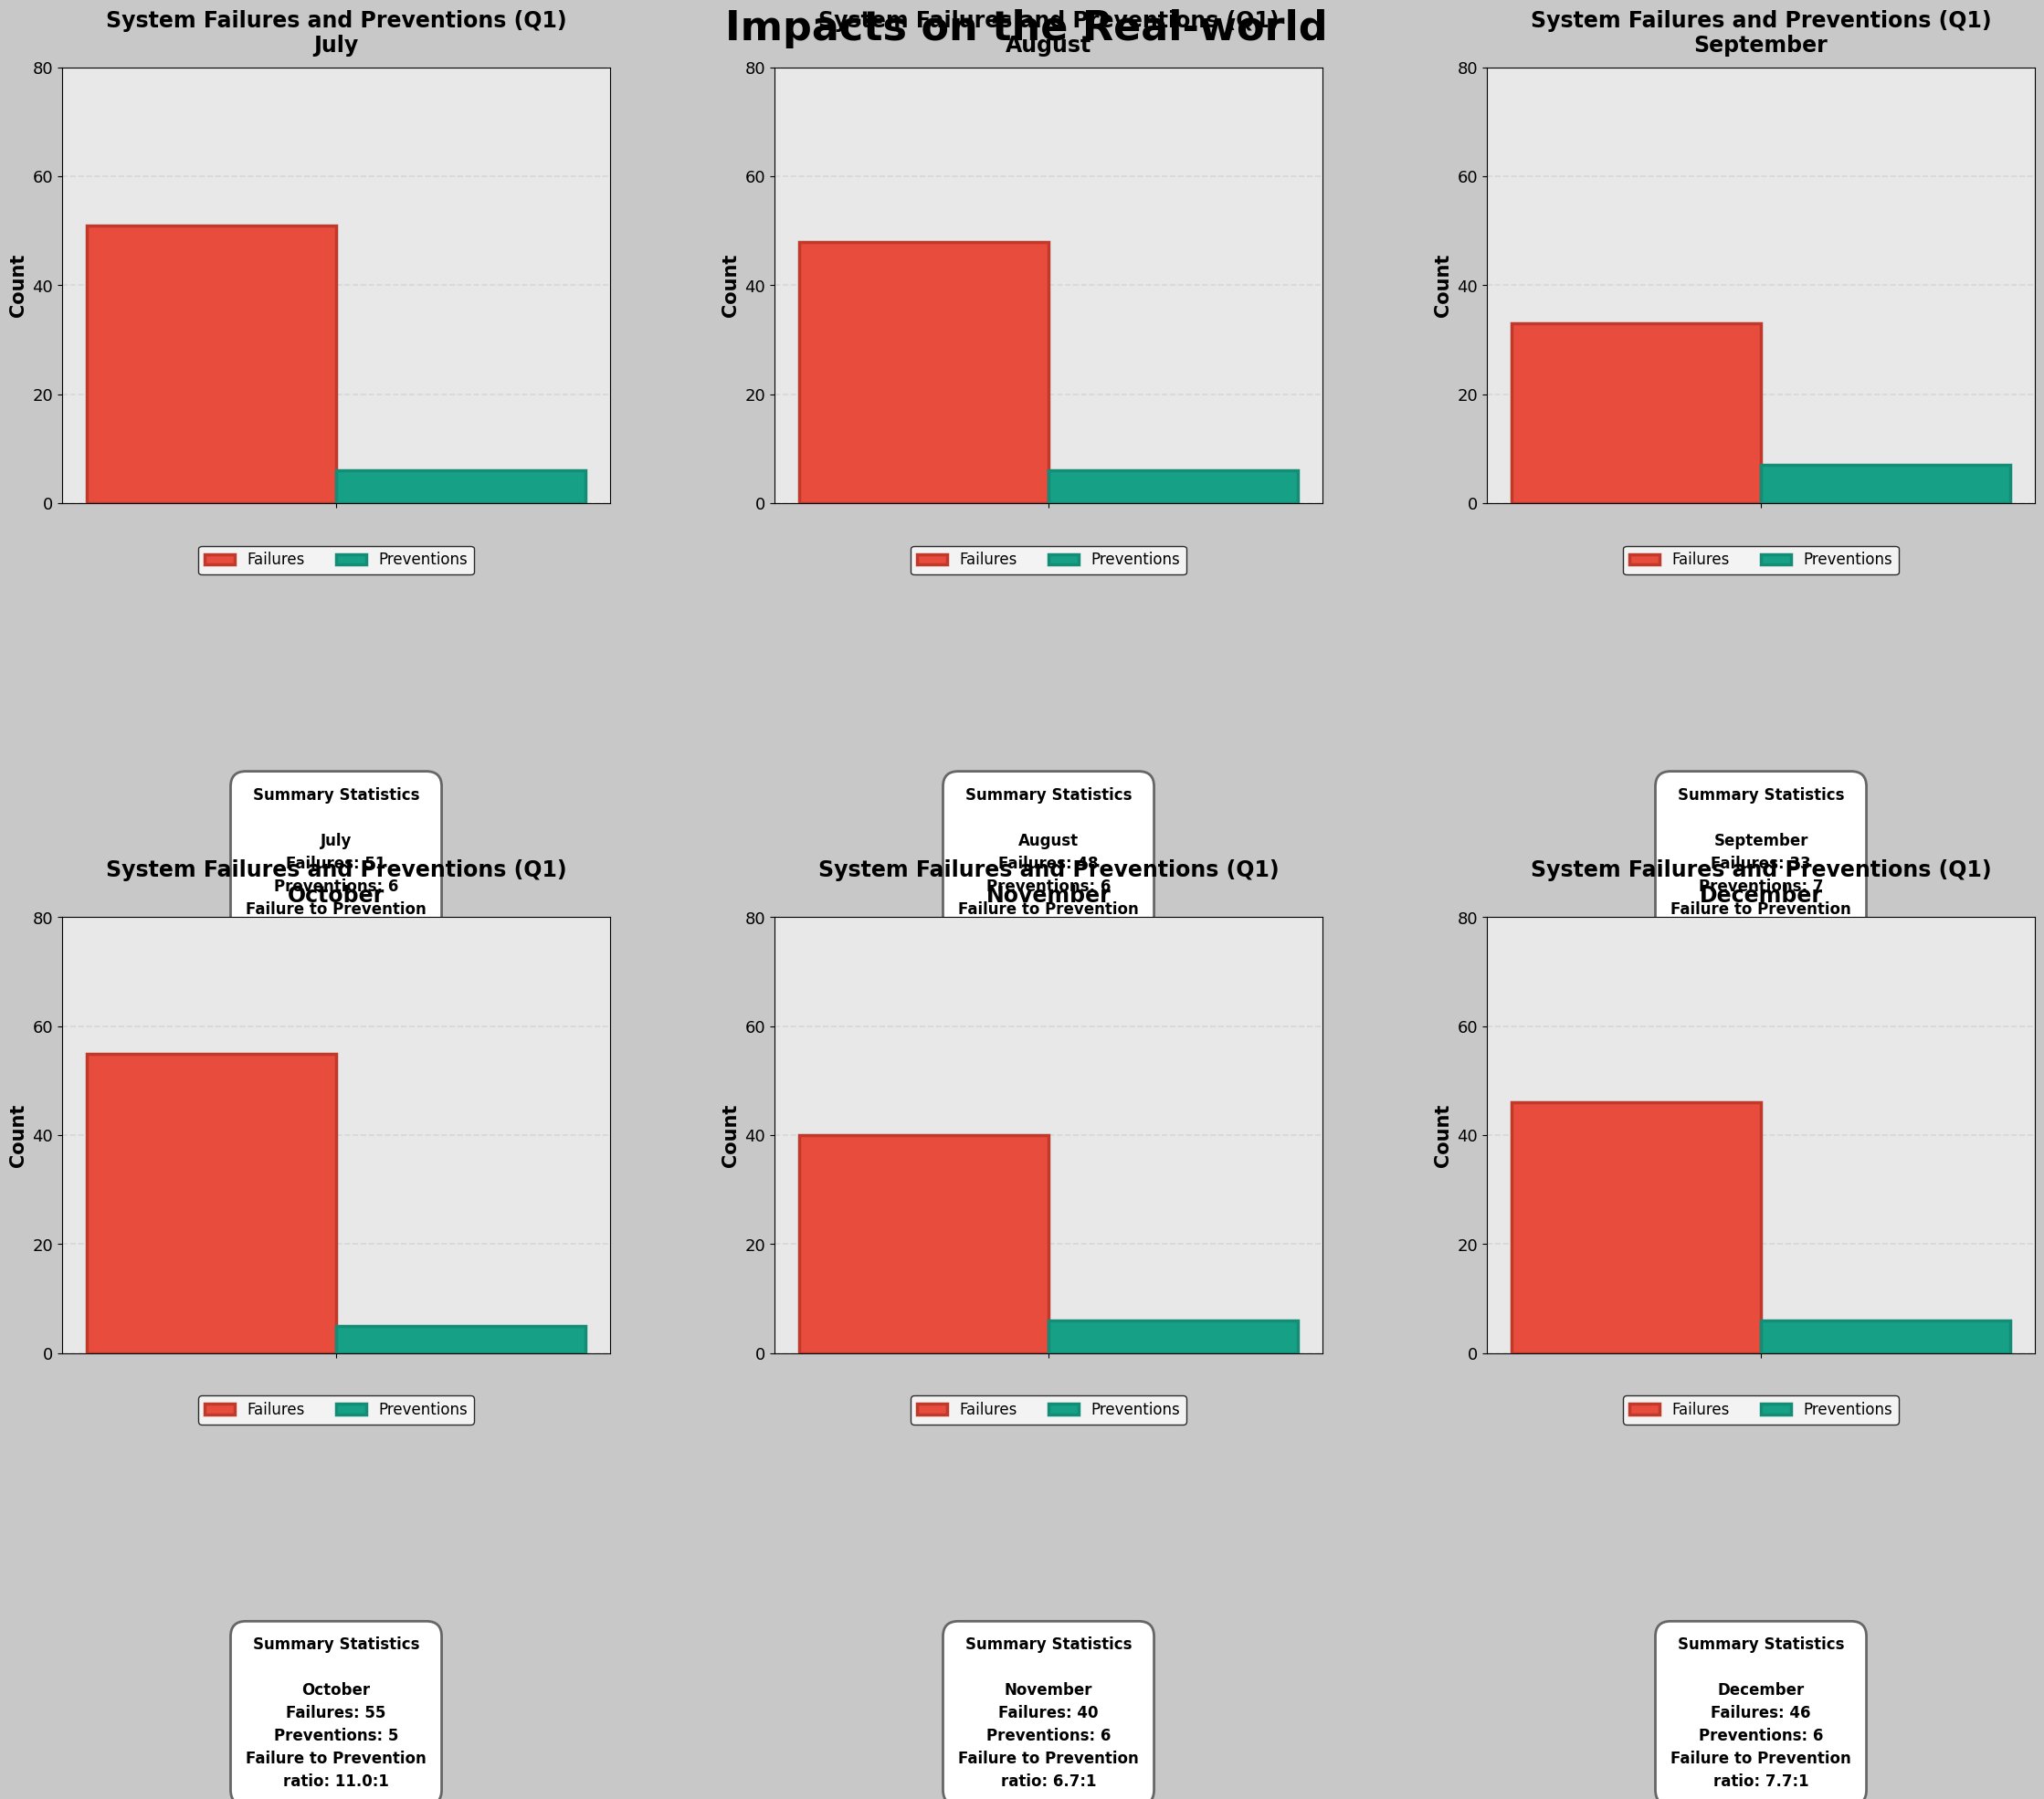


CHART CREATED SUCCESSFULLY!

SUMMARY OF ALL MONTHS:
July         | Total: 57 | Failures: 51 | Preventions: 6 | Ratio: 8.5:1
August       | Total: 54 | Failures: 48 | Preventions: 6 | Ratio: 8.0:1
September    | Total: 40 | Failures: 33 | Preventions: 7 | Ratio: 4.7:1
October      | Total: 60 | Failures: 55 | Preventions: 5 | Ratio: 11.0:1
November     | Total: 46 | Failures: 40 | Preventions: 6 | Ratio: 6.7:1
December     | Total: 52 | Failures: 46 | Preventions: 6 | Ratio: 7.7:1

OVERALL STATISTICS:
  • Total Failures: 273
  • Total Preventions: 36
  • Overall Ratio: 7.6:1



In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for all months
months_data = [
    {'month': 'July', 'failures': 51, 'preventions': 6, 'total': 57},
    {'month': 'August', 'failures': 48, 'preventions': 6, 'total': 54},
    {'month': 'September', 'failures': 33, 'preventions': 7, 'total': 40},
    {'month': 'October', 'failures': 55, 'preventions': 5, 'total': 60},
    {'month': 'November', 'failures': 40, 'preventions': 6, 'total': 46},
    {'month': 'December', 'failures': 46, 'preventions': 6, 'total': 52}
]

def create_chart():
    """
    Create a 3x2 grid of charts showing System Failures and Preventions
    """
    # Create LARGER figure with gray background
    fig, axes = plt.subplots(2, 3, figsize=(24, 16), facecolor='#c8c8c8')
    
    # Add main title - BIGGER
    fig.suptitle('Impacts on the Real-world', 
                 fontsize=32, fontweight='bold', y=0.98)
    
    # Flatten the 2D array of axes for easier iteration
    axes = axes.flatten()
    
    # Create subplot for each month
    for idx, data in enumerate(months_data):
        ax = axes[idx]
        ax.set_facecolor('#e8e8e8')
        
        # Extract data
        month = data['month']
        failures = data['failures']
        preventions = data['preventions']
        total = data['total']
        ratio = round(failures / preventions, 1)
        
        # Create bar chart with WIDER bars
        categories = ['']
        x_pos = np.arange(len(categories))
        width = 0.5  # Wider bars
        
        # Plot bars
        bars1 = ax.bar(x_pos - width/2, [failures], width, 
                       label='Failures', color='#e74c3c', 
                       edgecolor='#c0392b', linewidth=2.5)
        bars2 = ax.bar(x_pos + width/2, [preventions], width,
                       label='Preventions', color='#16a085',
                       edgecolor='#138d75', linewidth=2.5)
        
        # Set chart properties with LARGER fonts
        ax.set_ylim(0, 80)
        ax.set_yticks([0, 20, 40, 60, 80])
        ax.set_ylabel('Count', fontsize=15, fontweight='bold')
        ax.set_title(f'System Failures and Preventions (Q1)\n{month}',
                     fontsize=17, fontweight='bold', pad=12)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(categories)
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1.2)
        ax.set_axisbelow(True)
        
        # Larger tick labels
        ax.tick_params(axis='both', which='major', labelsize=13)
        
        # Add legend with BIGGER font - positioned better
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
                 ncol=2, frameon=True, fontsize=12, 
                 markerscale=1.5, edgecolor='black', fancybox=True)
        
        # Add statistics box with LARGER text - positioned lower to avoid overlap
        stats_text = f"Summary Statistics\n\n{month}\n"
        stats_text += f"Failures: {failures}\n"
        stats_text += f"Preventions: {preventions}\n"
        stats_text += f"Failure to Prevention\nratio: {ratio}:1"
        
        # Position text box below chart - MOVED DOWN MORE
        ax.text(0.5, -0.65, stats_text,
                transform=ax.transAxes,
                fontsize=12,
                verticalalignment='top',
                horizontalalignment='center',
                bbox=dict(boxstyle='round,pad=1.0',
                         facecolor='white', 
                         edgecolor='#666666',
                         linewidth=2),
                linespacing=1.5,
                fontweight='bold')
    
    # Adjust layout with MORE spacing to prevent overlap
    plt.subplots_adjust(left=0.06, right=0.96, top=0.94, bottom=0.06, 
                        hspace=0.95, wspace=0.30)
    
    # Save the figure in HIGHER resolution
    plt.savefig('system_failures_preventions_large.png', 
                dpi=400,
                bbox_inches='tight',
                facecolor='#c8c8c8')
    
    # Show the plot
    plt.show()
    
    print("\n" + "="*70)
    print("CHART CREATED SUCCESSFULLY!")
    print("="*70)
    print("\nSUMMARY OF ALL MONTHS:")
    print("="*70)
    for data in months_data:
        ratio = round(data['failures'] / data['preventions'], 1)
        print(f"{data['month']:12} | Total: {data['total']:2} | "
              f"Failures: {data['failures']:2} | Preventions: {data['preventions']} | "
              f"Ratio: {ratio}:1")
    print("="*70)
    
    # Calculate overall statistics
    total_failures = sum(d['failures'] for d in months_data)
    total_preventions = sum(d['preventions'] for d in months_data)
    overall_ratio = round(total_failures / total_preventions, 1)
    
    print(f"\nOVERALL STATISTICS:")
    print(f"  • Total Failures: {total_failures}")
    print(f"  • Total Preventions: {total_preventions}")
    print(f"  • Overall Ratio: {overall_ratio}:1")
    print("="*70 + "\n")


if __name__ == "__main__":
    create_chart()

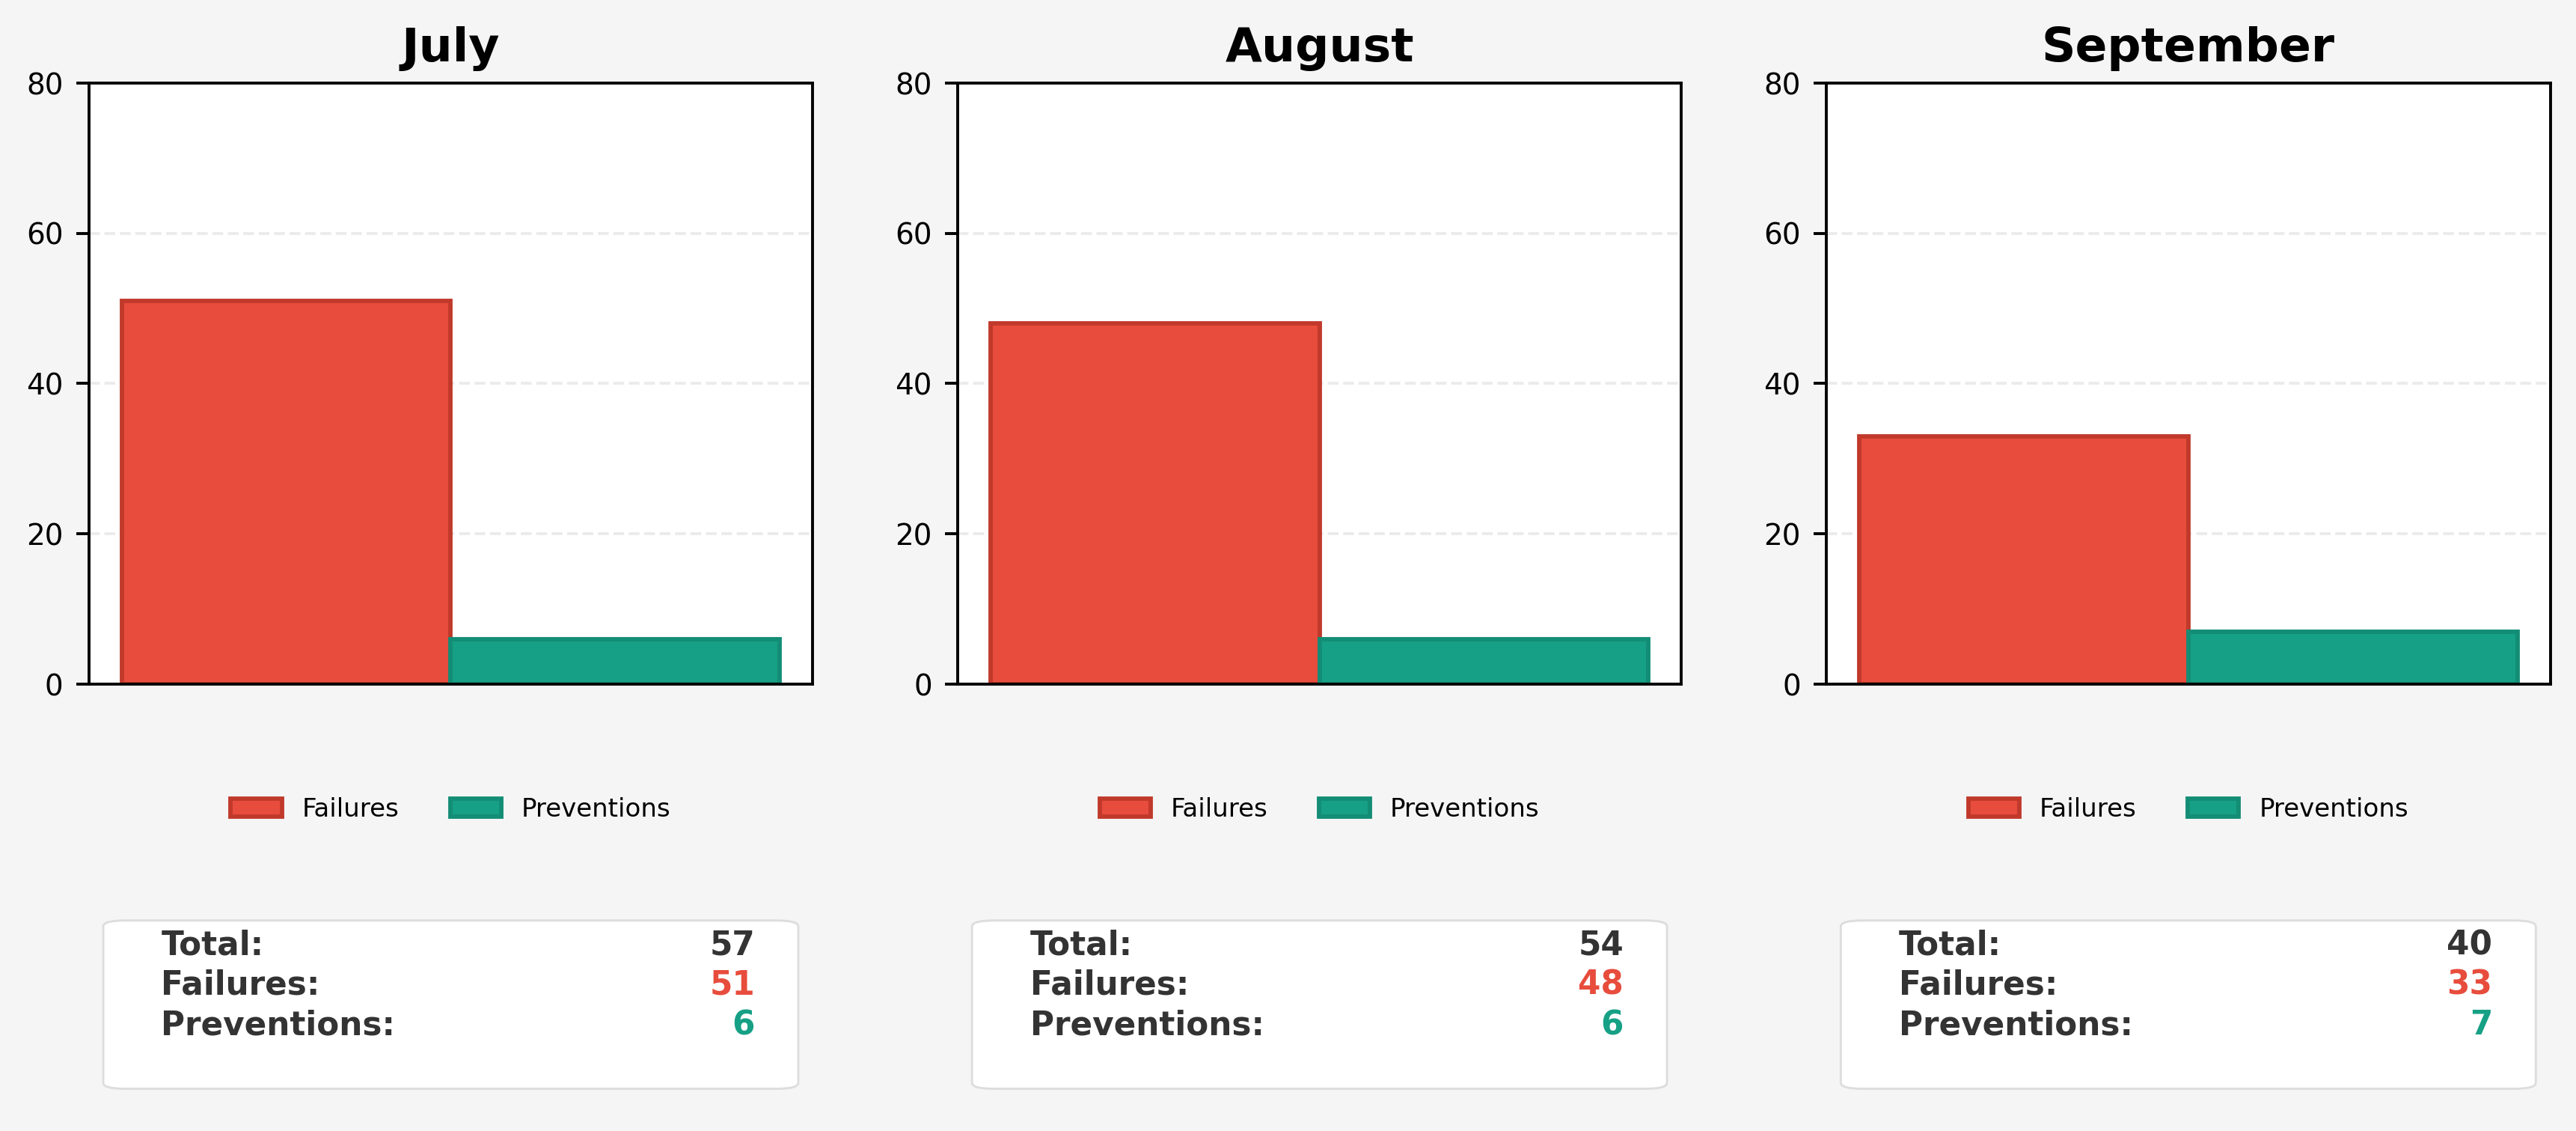

✔ Saved figure: impact_group_1_jul_sep.png


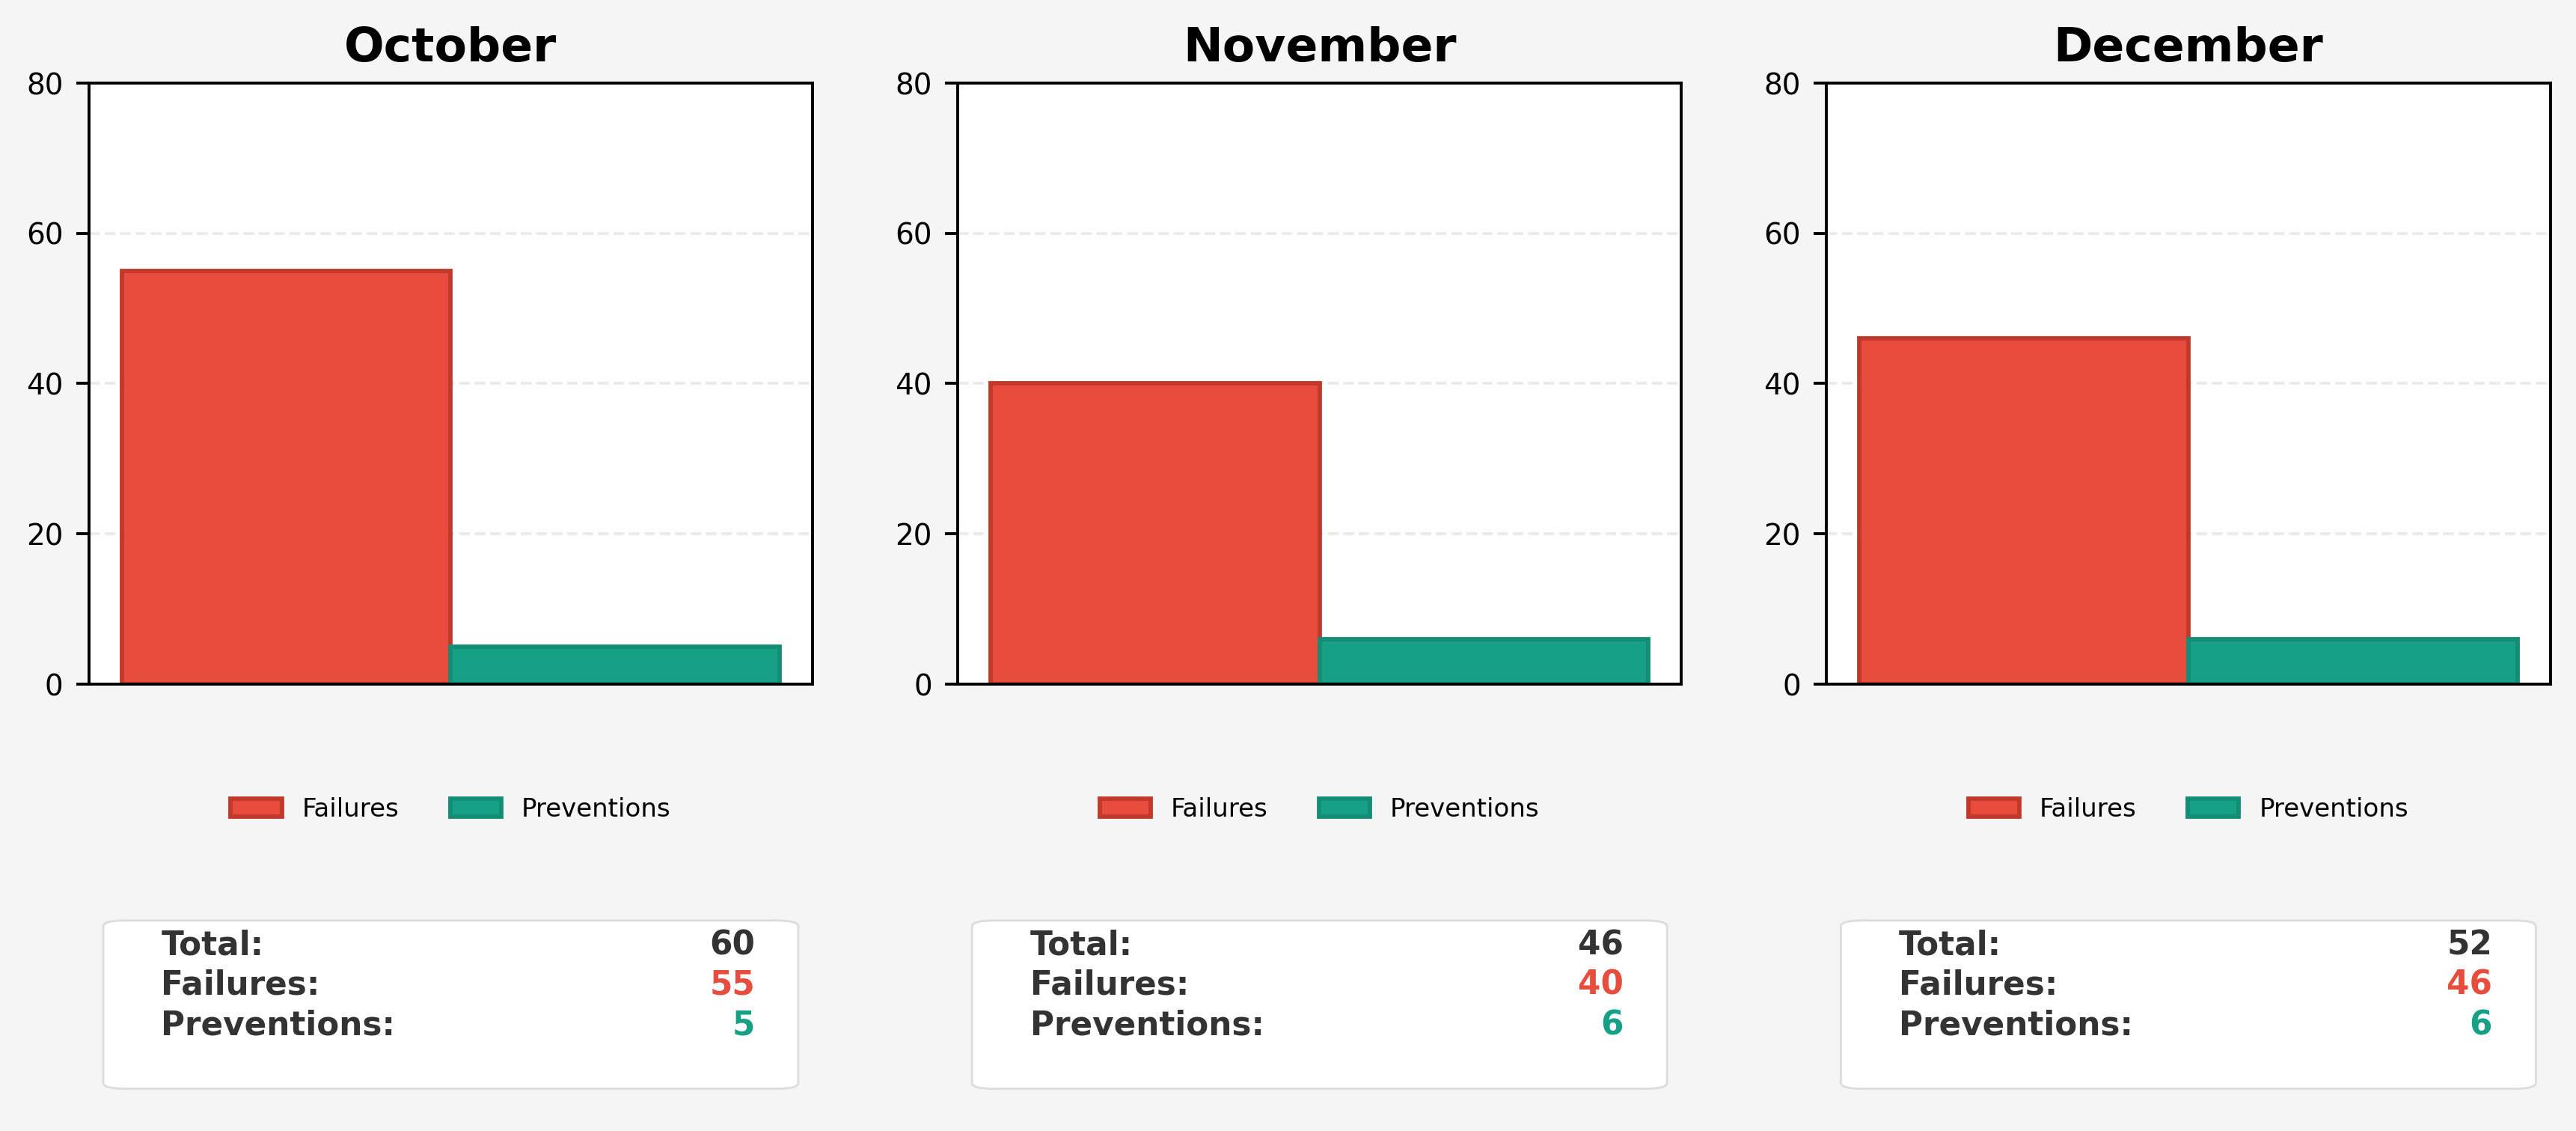

✔ Saved figure: impact_group_2_oct_dec.png


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch

# -----------------------
# DATA
# -----------------------
months_data = [
    {'month': 'July',      'failures': 51, 'preventions': 6, 'total': 57},
    {'month': 'August',    'failures': 48, 'preventions': 6, 'total': 54},
    {'month': 'September', 'failures': 33, 'preventions': 7, 'total': 40},
    {'month': 'October',   'failures': 55, 'preventions': 5, 'total': 60},
    {'month': 'November',  'failures': 40, 'preventions': 6, 'total': 46},
    {'month': 'December',  'failures': 46, 'preventions': 6, 'total': 52},
]


# -----------------------
# HELPERS
# -----------------------
def draw_month_card(ax_bar, ax_sum, data):
    """Draw one month: bar chart (ax_bar) + summary card (ax_sum)."""

    month = data["month"]
    failures = data["failures"]
    preventions = data["preventions"]
    total = data["total"]

    # ===== BAR CHART (TOP) =====
    ax_bar.set_facecolor("white")

    x = np.arange(1)          # single category
    width = 0.35

    ax_bar.bar(
        x - width / 2,
        [failures],
        width,
        label="Failures",
        color="#e74c3c",
        edgecolor="#c0392b",
        linewidth=1.2,
    )
    ax_bar.bar(
        x + width / 2,
        [preventions],
        width,
        label="Preventions",
        color="#16a085",
        edgecolor="#138d75",
        linewidth=1.2,
    )

    ax_bar.set_title(month, fontsize=13, fontweight="bold", pad=6)
    ax_bar.set_ylim(0, 80)
    ax_bar.set_yticks([0, 20, 40, 60, 80])
    ax_bar.tick_params(axis="y", labelsize=8)
    ax_bar.set_xticks([])
    ax_bar.grid(axis="y", linestyle="--", alpha=0.25)
    ax_bar.set_axisbelow(True)

    ax_bar.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=False,
        fontsize=7,
    )

    # ===== SUMMARY CARD (BOTTOM) =====
    ax_sum.set_xlim(0, 1)
    ax_sum.set_ylim(0, 1)
    ax_sum.axis("off")

    # white rounded box
    card = FancyBboxPatch(
        (0.04, 0.10),   # x, y
        0.92,           # width
        0.80,           # height
        boxstyle="round,pad=0.02,rounding_size=0.03",
        linewidth=0.6,
        edgecolor="#dddddd",
        facecolor="white",
    )
    ax_sum.add_patch(card)

    label_x = 0.10
    value_x = 0.92

    # just 3 rows now, spaced nicely
    y_total = 0.75
    y_fail = 0.55
    y_prev = 0.35

    # Total
    ax_sum.text(
        label_x, y_total, "Total:",
        fontsize=9, fontweight="bold",
        color="#333333", transform=ax_sum.transAxes
    )
    ax_sum.text(
        value_x, y_total, f"{total}",
        fontsize=9, fontweight="bold",
        color="#333333", ha="right",
        transform=ax_sum.transAxes
    )

    # Failures (red)
    ax_sum.text(
        label_x, y_fail, "Failures:",
        fontsize=9, fontweight="bold",
        color="#333333", transform=ax_sum.transAxes
    )
    ax_sum.text(
        value_x, y_fail, f"{failures}",
        fontsize=9, fontweight="bold",
        color="#e74c3c", ha="right",
        transform=ax_sum.transAxes
    )

    # Preventions (green)
    ax_sum.text(
        label_x, y_prev, "Preventions:",
        fontsize=9, fontweight="bold",
        color="#333333", transform=ax_sum.transAxes
    )
    ax_sum.text(
        value_x, y_prev, f"{preventions}",
        fontsize=9, fontweight="bold",
        color="#16a085", ha="right",
        transform=ax_sum.transAxes
    )


def create_group_figure(months_subset, filename):
    """
    Make one figure with 3 months:
    2 rows x 3 columns -> row 1 = charts, row 2 = summary cards
    """
    fig, axes = plt.subplots(
        2, 3,
        figsize=(10, 5),   # not too big, good for reports
        dpi=350,
        gridspec_kw={"height_ratios": [3, 1]},
    )
    fig.patch.set_facecolor("#f5f5f5")

    axes_bar = axes[0]
    axes_sum = axes[1]

    for i, data in enumerate(months_subset):
        draw_month_card(axes_bar[i], axes_sum[i], data)

    # Hide any unused axes (in case subset < 3)
    for j in range(len(months_subset), 3):
        axes_bar[j].axis("off")
        axes_sum[j].axis("off")

    plt.subplots_adjust(left=0.04, right=0.98, top=0.90, bottom=0.12, hspace=0.55)
    plt.savefig(filename, bbox_inches="tight", facecolor=fig.get_facecolor())
    plt.show()
    plt.close(fig)
    print(f"✔ Saved figure: {filename}")


# -----------------------
# MAIN
# -----------------------
if __name__ == "__main__":
    # First graph: 3 months (July–September)
    first_group = months_data[0:3]
    create_group_figure(first_group, "impact_group_1_jul_sep.png")

    # Second graph: 3 months (October–December)
    second_group = months_data[3:6]
    create_group_figure(second_group, "impact_group_2_oct_dec.png")
